In [1]:
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
!pip install spacy

In [4]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
!pip install wordcloud

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [8]:
data=pd.read_csv('/content/blogs (1).csv')

In [9]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [10]:
texts=data['Data']

##Removing punctuation, converting to lowercase,tokenizing, and removing stopwords.

In [11]:
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

processed_texts = [preprocess(text) for text in texts]


In [67]:
processed_texts

[['path',
  'cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowlandrestonansnetagatedocicacukuknetmcsungermanyeunetthothmchpsnidehorusapmchpsnided012s658frank',
  'frankd012s658uucp',
  'frank',
  'odwyer',
  'newsgroup',
  'altath',
  'subject',
  'islam',
  'genocid',
  'date',
  '23',
  'apr',
  '1993',
  '235147',
  'gmt',
  'organ',
  'siemensnixdorf',
  'ag',
  'line',
  '110',
  'distribut',
  'world',
  'messageid',
  '1r9vej5k5horusapmchpsnid',
  'refer',
  '1r4o8a6qefidoasdsgicom',
  '1r5ublbd6horusapmchpsnid',
  '1r76ek7uofidoasdsgicom',
  'nntppostinghost',
  'd012s658apmchpsnid',
  'articl',
  '1r76ek7uofidoasdsgicom',
  'liveseysolntzewpdsgicom',
  'jon',
  'livesey',
  'write',
  'articl',
  '1r5ublbd6horusapmchpsnid',
  'frankd012s658uucp',
  'frank',
  'odwyer',
  'write',
  'articl',
  '1r4o8a6qefidoasdsgicom',
  'liveseysolntzewpdsgicom',
  'jon',
  'livesey',
  'write',
  'note',
  'particular',
  'societi',
  'case',
  'm

## CountVectorizer and TF-IDF

In [13]:
count=CountVectorizer()

In [14]:
vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X = vectorizer.fit_transform(processed_texts)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
labels=data['Labels']

In [17]:
labels

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,labels,test_size=0.2,random_state=50)

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1600, 47244) (400, 47244) (1600,) (400,)


## Naive Bayes Model

In [20]:
multinb=MultinomialNB()

In [21]:
multinb.fit(x_train,y_train)

MultinomialNB()

In [22]:
y_pred=multinb.predict(x_test)

In [23]:
y_pred

array(['comp.sys.mac.hardware', 'sci.electronics',
       'soc.religion.christian', 'rec.sport.baseball',
       'talk.religion.misc', 'sci.crypt', 'comp.sys.mac.hardware',
       'comp.graphics', 'rec.sport.hockey', 'misc.forsale', 'sci.space',
       'sci.med', 'comp.graphics', 'comp.sys.ibm.pc.hardware',
       'sci.space', 'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'sci.crypt', 'rec.motorcycles', 'comp.graphics',
       'soc.religion.christian', 'talk.politics.misc', 'alt.atheism',
       'alt.atheism', 'talk.politics.misc', 'sci.space',
       'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'rec.sport.baseball', 'misc.forsale',
       'talk.politics.guns', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'sci.med', 'sci.crypt', 'misc.forsale', 'sci.crypt',
       'talk.religion.misc', 'talk.politics.misc', 'comp.graphics',
       'comp.sys.ibm.pc.hardware', 'sci.crypt', 'talk.politics.misc',
       'talk.religion.misc', 'sci.crypt', 'rec

In [24]:
accuracy_score(y_test,y_pred)

0.8225

In [25]:
multi=MultinomialNB()

In [26]:
multi.fit(X,data['Labels'])

MultinomialNB()

In [27]:
y_pred1=multi.predict(X)

In [28]:
y_pred1

array(['alt.atheism', 'alt.atheism', 'alt.atheism', ...,
       'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc'],
      dtype='<U24')

In [29]:
accuracy_score(data['Labels'],y_pred1)

0.99

## Sentiment Analysis

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [33]:
!pip install textblob

In [34]:
from textblob import TextBlob

In [35]:
blog_posts=data['Data']

In [36]:
blog_posts

,Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....


In [37]:
blob=TextBlob(blog_posts[0])

In [38]:
sentiment=blob.sentiment

In [43]:
print(sentiment)

Sentiment(polarity=0.07221261160714285, subjectivity=0.5033277529761905)


In [44]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(blog_posts[0])

In [48]:
aff=pd.read_csv('/content/Afinn.csv',encoding='latin-1')

In [49]:
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [50]:
aff_dict=aff.set_index('word')['value'].to_dict()

In [51]:
aff_dict.get('good',0)

3

In [52]:
def sentiment_score(text,str=None):
  sent_count=0
  if text:
    doc=nlp(text)
    for token in doc:
      sent_count+=aff_dict.get(token.lemma_,0)
  return sent_count


In [54]:
data['sentiment_score']=data['Data'].apply(sentiment_score)

In [55]:
data

,Data,Labels,sentiment_score
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-17
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,9
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-29
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-123
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,8
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,6
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,4
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,6
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,16


In [58]:
data.rename(columns={'Data':'sentence'})

,sentence,Labels,sentiment_score
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-17
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,9
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-29
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-123
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,8
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,6
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,4
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,6
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,16


In [63]:
data['Total_words']=data['Data'].str.split().apply(len)

In [64]:
data

,Data,Labels,sentiment_score,Total_words
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-17,910
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,9,163
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,-29,450
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,-123,2732
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,8,438
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,6,782
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,4,208
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,6,219
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,16,469


In [65]:
data['index']=range(len(data))

<Axes: xlabel='index', ylabel='sentiment_score'>

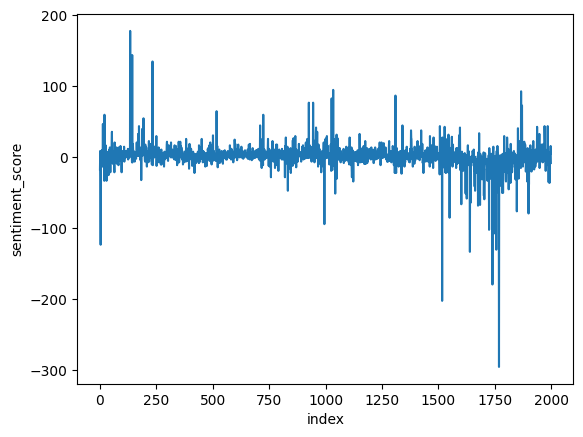

In [66]:
sns.lineplot(x='index',y='sentiment_score',data=data)

## Evaluation Criteria

## •	Accuracy and robustness of the Naive Bayes classification model.

## Accuracy of Naive Bayes

Probabilistic Framework: Naive Bayes predicts the class of a data point based on the probabilities of the features given the class label. The accuracy depends on how well the underlying assumptions hold true.

Independence Assumption: The "naive" part of Naive Bayes refers to the assumption that all features are independent of each other given the class label. In reality, this assumption is often violated, which can affect accuracy. However, even when features are correlated, Naive Bayes can still perform reasonably well.

Effectiveness in Text Classification: Naive Bayes is particularly effective for high-dimensional datasets like text data. In tasks such as spam detection or sentiment analysis, it often yields high accuracy due to the abundance of training data.



## Robustness of Naive Bayes

Robust to Irrelevant Features: Naive Bayes can handle irrelevant features relatively well because the model is based on probabilities. While these features might not contribute to the prediction, they don't drastically affect the model.

Performance with Limited Data: Naive Bayes tends to perform well even with small training datasets. It can generalize from fewer samples, making it a robust choice for scenarios with limited labeled data.

Sensitivity to Data Quality: The model can be sensitive to noise in the data. Outliers or mislabeled examples can skew the probabilities, leading to less reliable predictions.



## •	Depth and insightfulness of the sentiment analysis.